In [105]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [106]:
df = pd.read_csv('population_prospects.csv')

In [107]:
matplotlib.rcParams['font.sans-serif'] = "Ubuntu Mono"
matplotlib.rcParams['font.family'] = "sans-serif"

first_plot = df.loc[(df['year'] <= 2020)]

lst = ['instant replacement', 'high variant', 'momentum', 'medium variant', 'zero migration', 'constant fertility', 
       'constant mortality', 'no change', 'low variant']

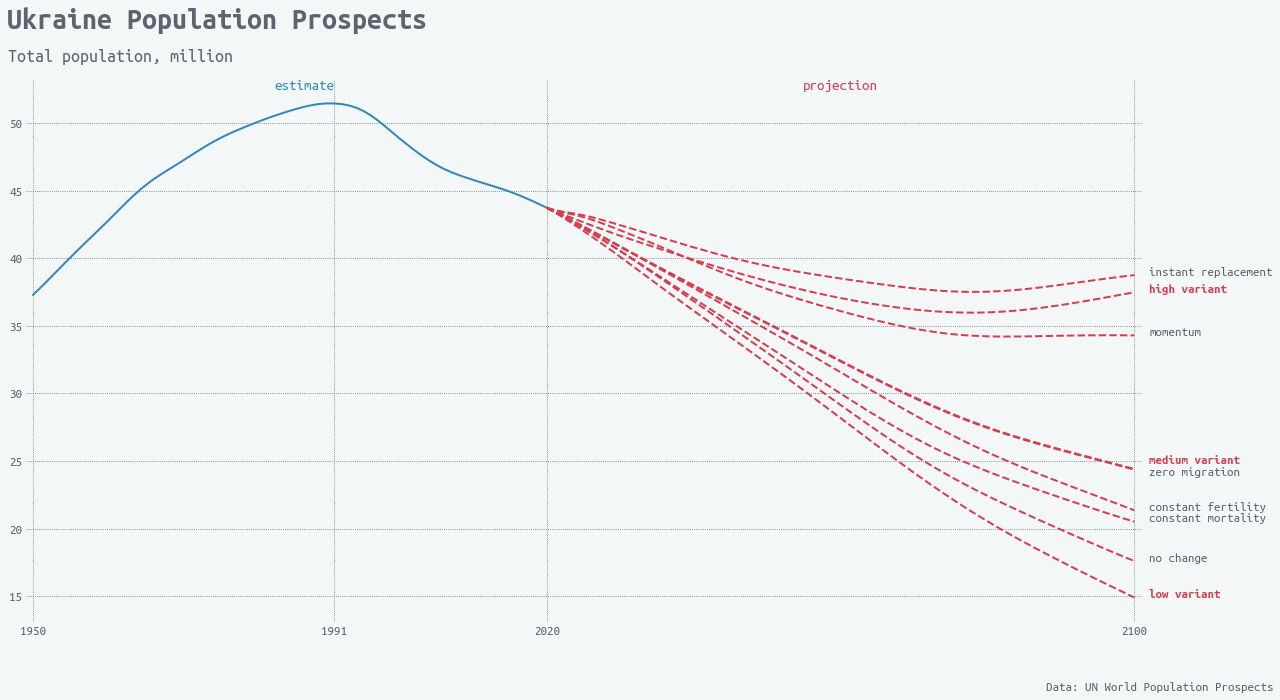

In [115]:
fig, ax = plt.subplots(figsize = (20,10))

ax.set_xlim(1949, 2101)
ax.yaxis.set_ticklabels(np.arange(10, 55, 5))
ax.set_xticks([1950, 1991, 2020, 2100])

ax.plot('year', 'population', data = first_plot, linewidth = 2, color = '#3288bd')

red_style = dict(size=13, color= '#d53e4f', weight="bold")
gray_style  = dict(size=13, color = '#5D646F')

for el in lst:
    obj = df.loc[(df['type'] == el)]
    
    ax.plot('year', 'population', data = obj, linestyle = 'dashed', linewidth = 2, color = '#d53e4f')
    
    if el in ['high variant', 'medium variant', 'low variant']:
        if el == 'medium variant':
            ax.text(x = obj['year'].iloc[-1] + 2, y = obj['population'].iloc[-1] + 400, s = el, **red_style)
        else:
            ax.text(x = obj['year'].iloc[-1] +2, y = obj['population'].iloc[-1], s = el, **red_style)
    elif el == 'zero migration':
        ax.text(x = obj['year'].iloc[-1] +2, y = obj['population'].iloc[-1] - 400, s = el,  **gray_style)
    else:
        ax.text(x = obj['year'].iloc[-1] +2, y = obj['population'].iloc[-1], s = el,  **gray_style)
        
ax.text(x = (2020+1954)/2, y = 52500 , s = 'estimate', color = '#3288bd', size = 15, ha='center')
ax.text(x = (2020+2100)/2, y = 52500 , s = 'projection', color = '#d53e4f', size = 15, ha='center')
ax.text(x = 2088, y = 8000 , s = 'Data: UN World Population Prospects', size = 13, color = '#5D646F')

ax.grid(True, color = '#5D646F', linestyle = ':')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_facecolor('#F3F7F7')
fig.patch.set_facecolor('#F3F7F7')

matplotlib.pyplot.xticks(**gray_style)
matplotlib.pyplot.yticks(**gray_style)
ax.tick_params(length = 0)

plt.title("Total population, million", x = 0.085, y = 1.02, size = 18, color = '#5D646F')
fig.suptitle("Ukraine Population Prospects", x = 0.258, y = 0.98, size = 30, color = '#5D646F', weight="bold")
plt.savefig('syvokhip_hw.png', facecolor = "#F3F7F7")